In [1]:
"""
基于词向量模型，生成和可视化"法治"的语义网络
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from gensim.models import KeyedVectors
import matplotlib.font_manager as fm
import sys
import warnings
import networkx as nx

warnings.filterwarnings('ignore')

# 设置更好的可视化风格
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# 假设notebooks目录在项目根目录下
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from src.utils import download_chinese_font
import src.utils as utils

# 下载并安装字体
font_path = download_chinese_font()

# 设置matplotlib使用下载的字体
if font_path:
    #plt.rcParams['font.sans-serif'] = ['SimHei'] + plt.rcParams['font.sans-serif']
    # 使用绝对路径以确保找到字体
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
    print(f"成功设置中文字体: {font_prop.get_name()}")
else:
    print("无法设置中文字体，将使用替代方案")

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 定义项目根目录和模型目录
PROJECT_ROOT = Path.cwd().parent
MODELS_DIR = PROJECT_ROOT / "models"


字体已存在: /home/fangshikai/.fonts/SimHei.ttf
刷新字体缓存...
成功设置中文字体: SimHei


=== “法治”语义网络分析 ===
使用固定时期模型目录: /home/fangshikai/law-word-vector/models/fine_tuned_vectors_flexible
找到 3 个模型文件:
  加载模型: Era1_1978-1996
  成功加载 Era1_1978-1996, 词汇量: 4874
  加载模型: Era2_1997-2013
  成功加载 Era2_1997-2013, 词汇量: 4992
  加载模型: Era3_2014-2024
  成功加载 Era3_2014-2024, 词汇量: 5000

成功加载了 3 个模型: ['Era1_1978-1996', 'Era2_1997-2013', 'Era3_2014-2024']

--- 正在处理时期: Era1_1978-1996 ---
网络创建成功: 51个节点, 422条边


已保存网络图到: /home/fangshikai/law-word-vector/output/network_plots/semantic_network_Era1_1978-1996.png


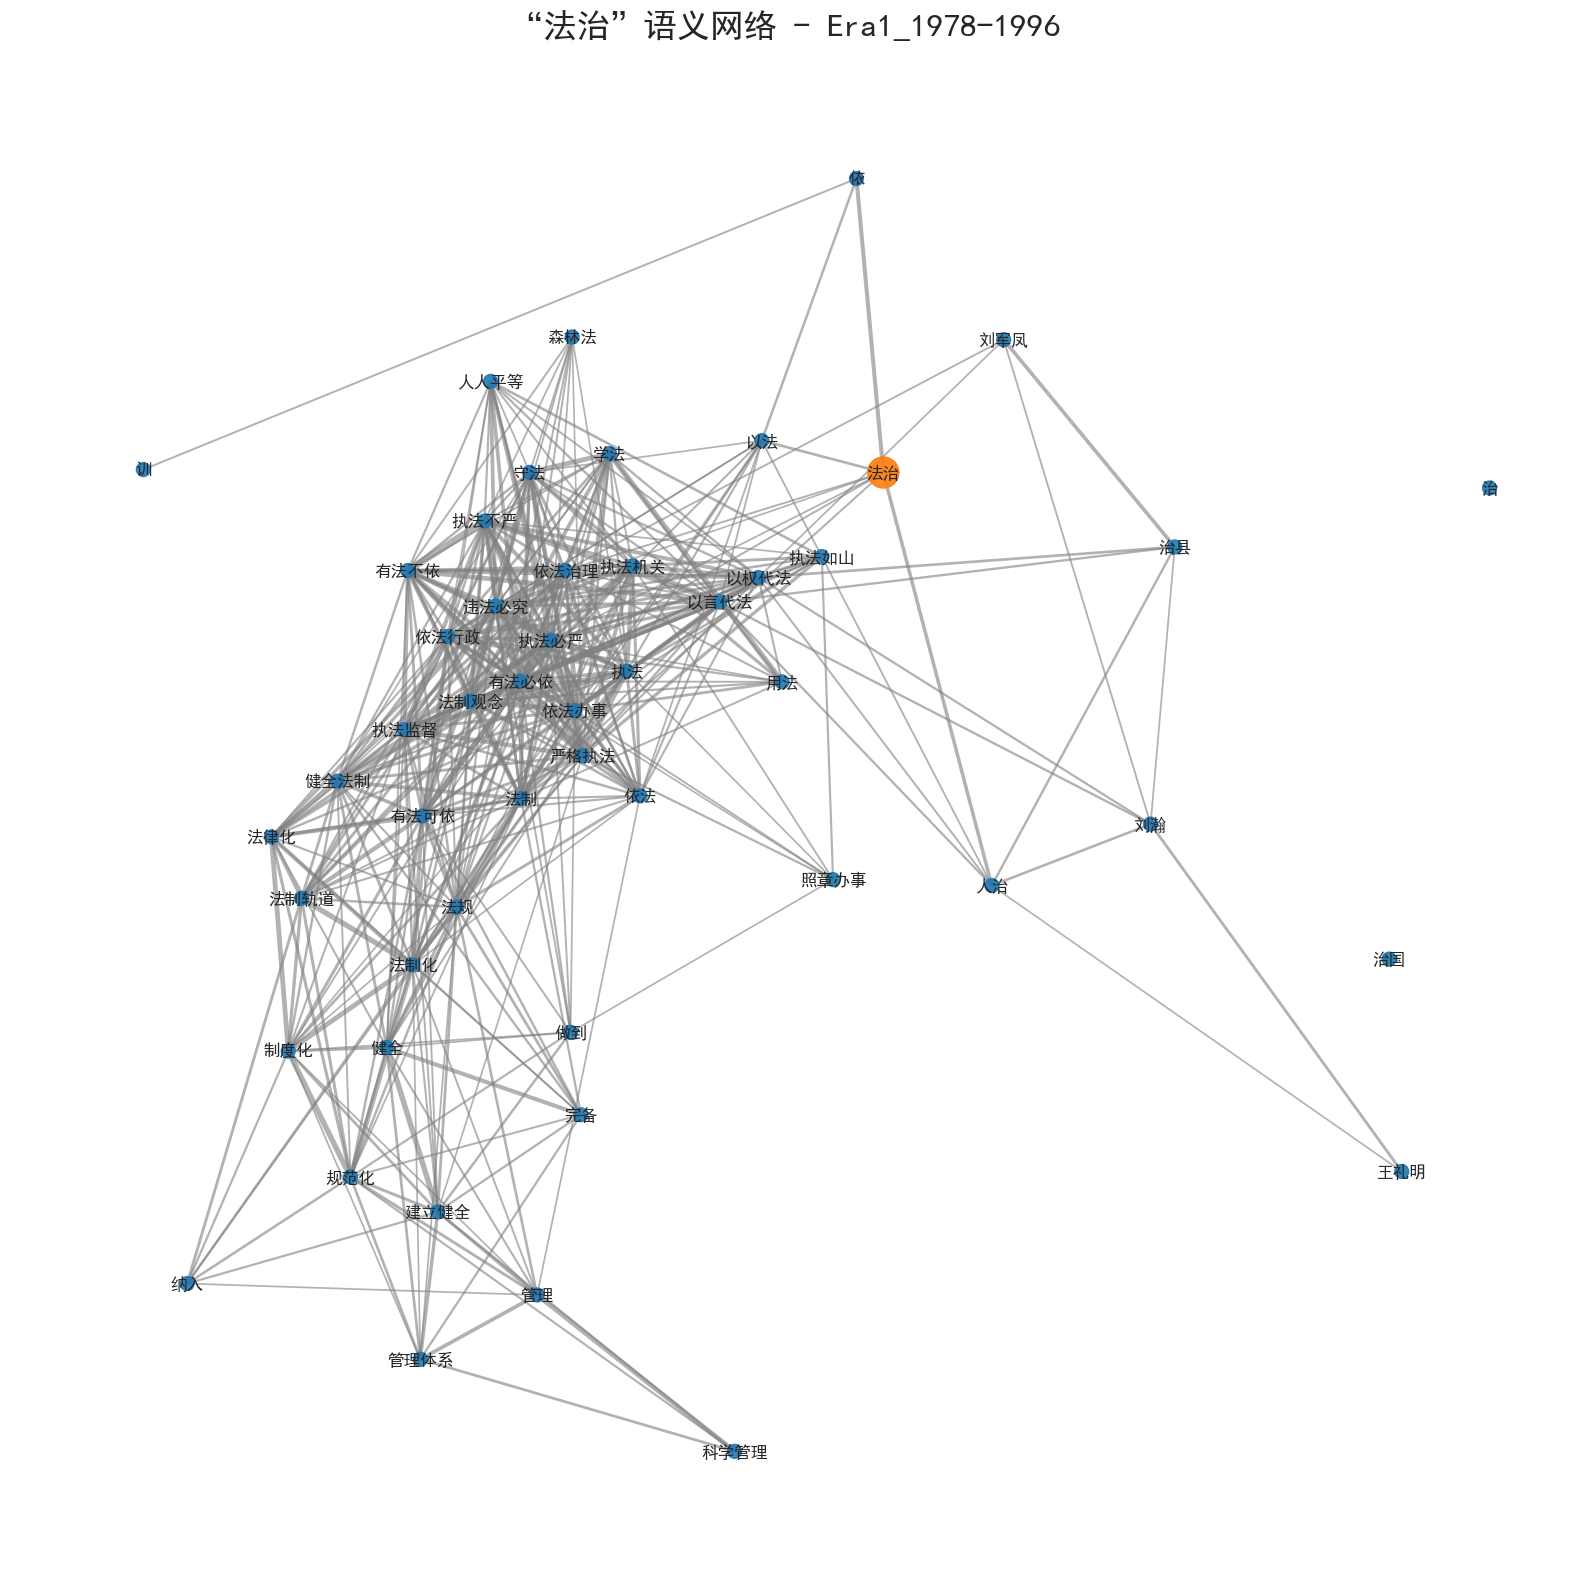


--- 正在处理时期: Era2_1997-2013 ---
网络创建成功: 51个节点, 504条边
已保存网络图到: /home/fangshikai/law-word-vector/output/network_plots/semantic_network_Era2_1997-2013.png


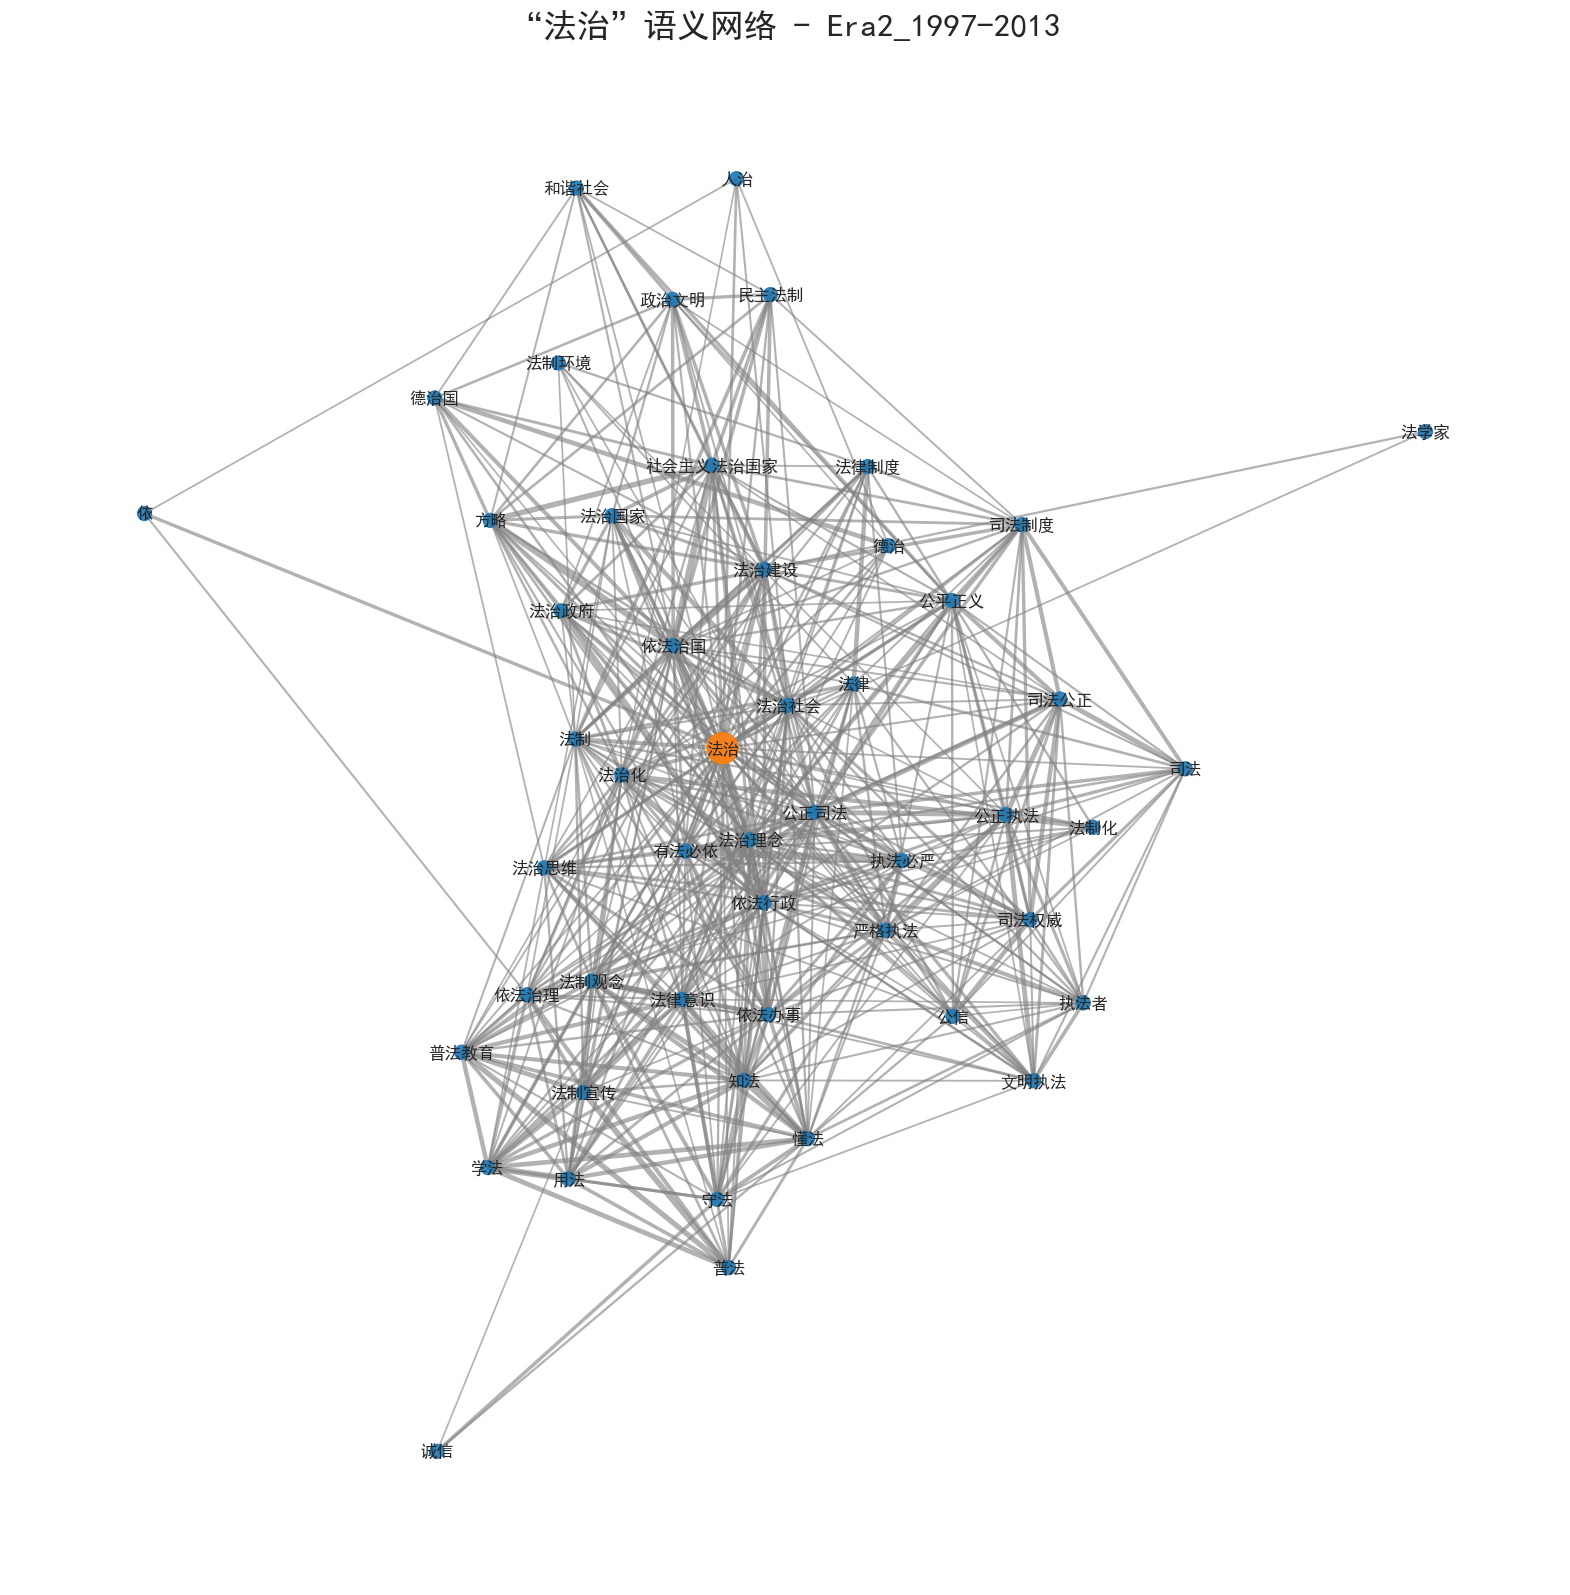


--- 正在处理时期: Era3_2014-2024 ---
网络创建成功: 51个节点, 393条边
已保存网络图到: /home/fangshikai/law-word-vector/output/network_plots/semantic_network_Era3_2014-2024.png


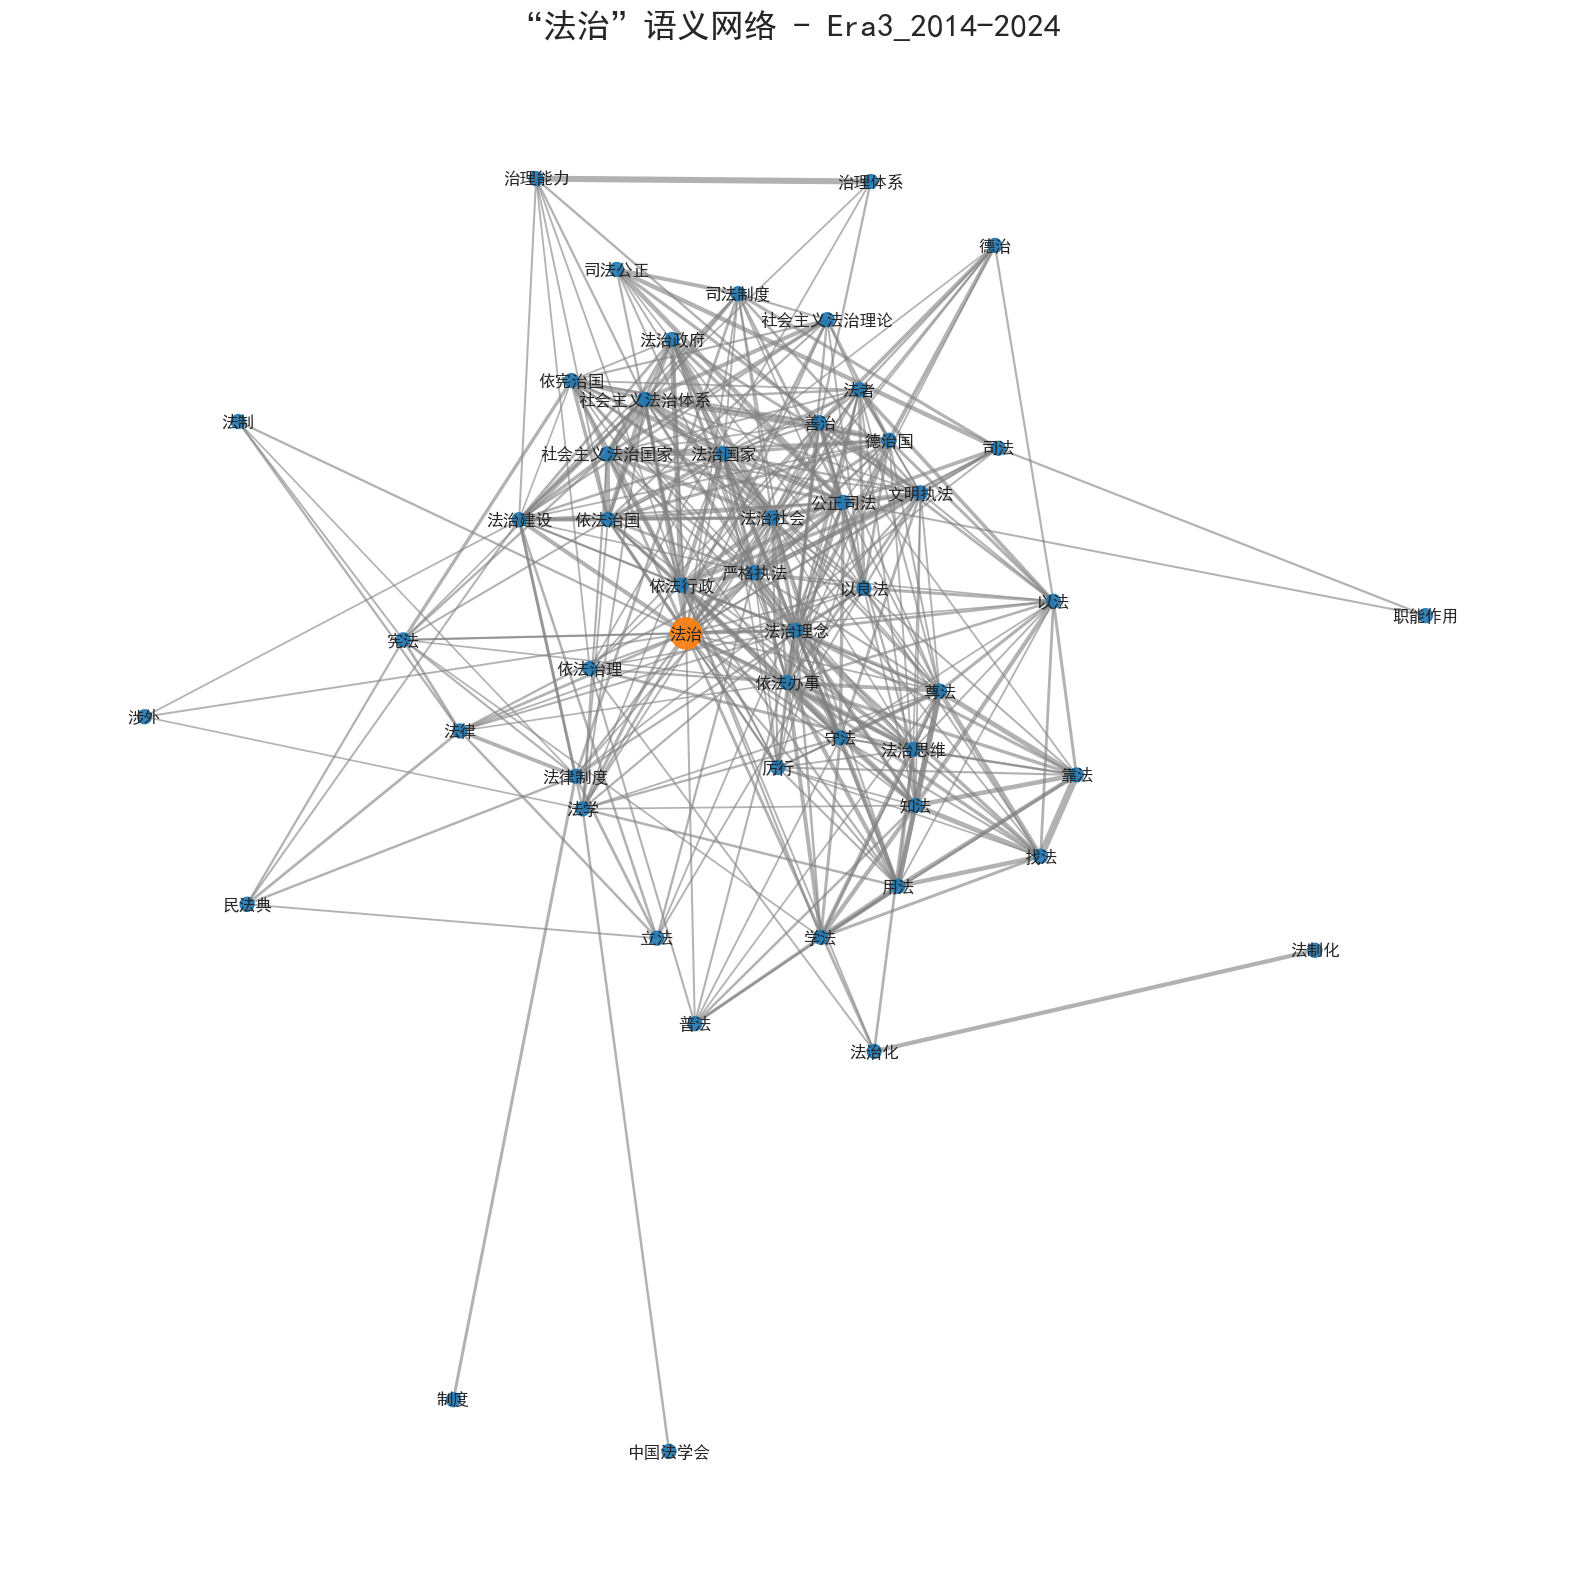


=== 分析完成 ===


In [3]:
from network_analysis import create_semantic_network, visualize_network_matplotlib


print("=== “法治”语义网络分析 ===")

# 1. 加载模型
models = utils.load_models(MODELS_DIR)

if not models:
    print("没有成功加载任何模型，请检查模型路径")
else:
    print(f"\n成功加载了 {len(models)} 个模型: {list(models.keys())}")

# 创建输出目录
output_dir = PROJECT_ROOT / "output" / "network_plots"
output_dir.mkdir(parents=True, exist_ok=True)

# 2. 为每个时期生成并可视化网络
for period, model in models.items():
    print(f"\n--- 正在处理时期: {period} ---")
    
    # 创建网络
    G = create_semantic_network(model, target_word="法治", top_n=50, similarity_threshold=0.45)
    
    if G:
        print(f"网络创建成功: {len(G.nodes())}个节点, {len(G.edges())}条边")
        # 可视化
        visualize_network_matplotlib(G, period, target_word="法治", output_dir=output_dir)
    else:
        print("网络创建失败或为空")

print("\n=== 分析完成 ===")